## Busquedas, Correlaciones y Graficas

In [1]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# cargar datos
datos = pd.read_csv('./data/student-mat.csv')
df = pd.DataFrame(datos)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Revisar datos faltantes

In [3]:
# sustituir NaN de la columna health
datos['health'].fillna(0, inplace=True)

### Dividir el dataframe en dos partes

In [4]:
# escuela GP
df1 = datos.loc[(datos['school'] == 'GP')]

In [5]:
# escuela MS
df2 = datos.loc[(datos['school'] == 'MS')]

### Filtrar resultados que cumplan varias condiciones

In [6]:
# filtrar N° de alumnos que tengan mas de 10 inasistencias y hayan reprobado mas de 2 materias de la escuela GP

#len indica el N° de registros del df
#              condicion 1              condicion 2
cnt = len(df1[(df1['absences'] > 10) & (df1['failures'] > 2)])
cnt

2

In [8]:
# sin el len, imprime el dataframe con los registros que cumplen las condiciones
cnt2 = df1[(df1['absences'] > 10) & (df1['failures'] > 2)]
cnt2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,16,6,5,5
247,GP,M,22,U,GT3,T,3,1,services,services,...,5,4,5,5,5,1,16,6,8,8


### Filtrar columnas de resultados que cumplan varias condiciones

In [9]:
# obtener el nivel de salud, sexo y tiempo de viaje de alumnos con mas de 10 inasistencia 
# y mas de 2 materias reprobadas

#        condicion 1              condicion 2            nombre_columnas
df1.loc[(df1['absences'] > 10) & (df1['failures'] > 2), ('health', 'sex', 'traveltime')]

,health,sex,traveltime
18,5,M,1
247,1,M,1


### Alternativa: Filtrar resultados que cumplan varias condiciones

In [10]:
#    condicion 1               condicion 2          count() columna_base
df1[(df1['absences'] > 10) & (df1['failures'] > 2)].count()['failures']

2

### Filtrar resultados que cumplan una condicion

In [11]:
# obtener los trabajos del padre de alumnos varones 
df1[df1['sex'] =='M']['Mjob']

5      services
6         other
8      services
9         other
12       health
         ...   
330       other
341     teacher
342    services
346     teacher
347     teacher
Name: Mjob, Length: 166, dtype: object

In [13]:
# obtener el trabajo del padre de los primeros 10 alumnos varones
df1[df1['sex'] =='M'].iloc[0:10]['Mjob']

5     services
6        other
8     services
9        other
12      health
13     teacher
14       other
18    services
19      health
20     teacher
Name: Mjob, dtype: object

### Correlacion

In [14]:
# correlacion entre le tiempo libre y el consumo de alcohol
# cercano a 1: si se relacionan. cercano a 0: no se relacionan
df1['freetime'].corr(df1['Dalc'])

0.17778939565278204

In [15]:
# correlacion entre el consumo de alcohol y la calidad de la relacion familiar
df1['Dalc'].corr(df1['famrel'])

-0.0873692100196843

In [16]:
var1 = 'G2'
var2 = 'G3'
df1[var1].corr(df1[var2])

0.9027826261970956

### Grafica con Matplotlib

In [17]:
# Diccionario para cambiar de valores numericos a string
mymap = {'Muy bajo':1, 'Bajo':2, 'Medio':3, 'Alto':4, 'Muy Alto':5}

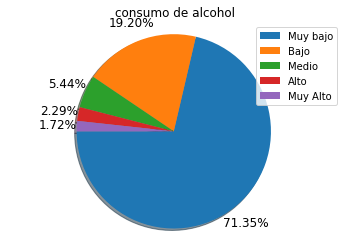

In [28]:
# grafico de pie para el consumo de alcohol
(
    df1.Dalc.value_counts()
    .plot(
        kind='pie', 
        labels=None, # sin las etiquetas por defecto
        autopct='%1.2f%%', #numero de decimales
        shadow=True, 
        startangle=180, # angulo del grafico
        fontsize=12, 
        pctdistance=1.2, # distancia de los % a la grafica
        labeldistance=1.4) # distancia de las etiquetas
)

plt.title('consumo de alcohol')
plt.legend(loc='best', labels=mymap)
plt.ylabel('')
plt.axis('equal')
plt.show()
